In [1]:
import pandas as pd
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.keys import Keys

In [2]:
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

In [3]:
page_url = "https://witcher.fandom.com/wiki/Category:Characters_in_the_stories"
driver.get(page_url)

In [4]:
from selenium.webdriver.common.by import By

book_categories = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')

In [5]:
book_categories[0].text

'Category:Baptism of Fire characters'

In [6]:
book_categories[0].get_attribute('href')

'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'

In [7]:
driver.get(book_categories[0].get_attribute('href'))

In [8]:
character_elements = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')

In [9]:
character_elements[0].text

'Adalia'

In [10]:
# Create Driver
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

# Go to the characters in the books page
page_url = "https://witcher.fandom.com/wiki/Category:Characters_in_the_stories"
driver.get(page_url)

time.sleep(3)

# Find Books
book_categories = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')

books = []
for category in book_categories:
    book_url = category.get_attribute('href')
    book_name = category.text
    books.append({'book_name': book_name, 'url': book_url})

In [11]:
books

[{'book_name': 'Category:Baptism of Fire characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'},
 {'book_name': 'Category:Blood of Elves characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Blood_of_Elves_characters'},
 {'book_name': "Godamba Thaess'en",
  'url': 'https://witcher.fandom.com/wiki/Godamba_Thaess%27en'},
 {'book_name': 'Category:Season of Storms characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Season_of_Storms_characters'},
 {'book_name': 'Category:Something Ends, Something Begins characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Something_Ends,_Something_Begins_characters'},
 {'book_name': 'Category:Sword of Destiny characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Sword_of_Destiny_characters'},
 {'book_name': 'Category:Szpony i kły characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Szpony_i_k%C5%82y_characters'},
 {'book_name': 'Category:Tales from the world of The W

In [12]:
character_list = []

for book in books:
    # go to book page
    driver.get(book['url'])
    character_elements = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')

    for element in character_elements:
        character_list.append({'book': book['book_name'], 'character': element.text})

In [13]:
df = pd.DataFrame(character_list)

In [14]:
df

book               character
0      Category:Baptism of Fire characters                  Adalia
1      Category:Baptism of Fire characters                   Adela
2      Category:Baptism of Fire characters           Aen Saevherne
3      Category:Baptism of Fire characters                Aevenien
4      Category:Baptism of Fire characters                  Aglaïs
...                                    ...                     ...
1270  Category:Time of Contempt characters        Yanna of Murivel
1271  Category:Time of Contempt characters           Yarpen Zigrin
1272  Category:Time of Contempt characters  Yennefer of Vengerberg
1273  Category:Time of Contempt characters         Yiolenta Suarez
1274  Category:Time of Contempt characters                   Zyvik

[1275 rows x 2 columns]

In [15]:
# Save the DataFrame to a CSV file
df.to_csv('characters.csv', index=False)

In [16]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

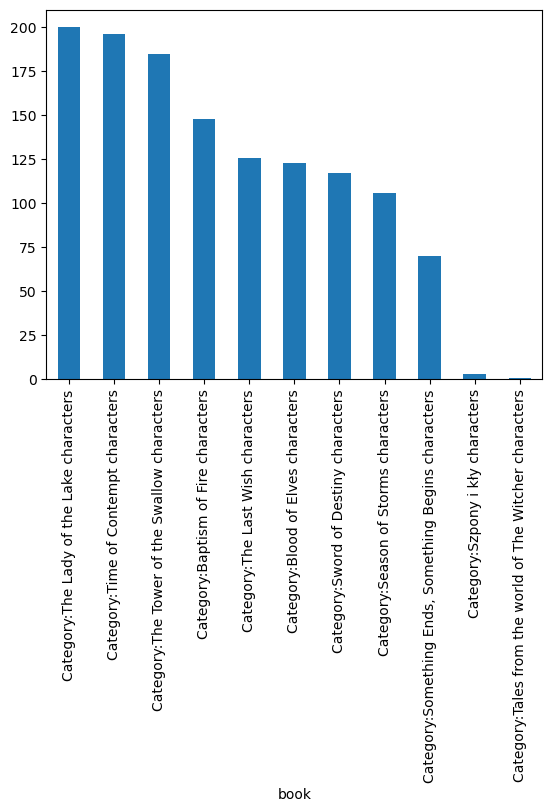

In [17]:
character_df = pd.DataFrame(character_list)

character_df['book'].value_counts().plot(kind="bar")
plt.show